# ***House Price Prediction (Without using Scikit-Learn)***

## Importing Required Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning Computations\Datasets\House_prices.csv")

In [7]:
df.drop(df.columns[[0,1]], axis = 1, inplace = True)

In [8]:
# Checking for any null Values
df.isna().sum().sort_values(ascending = False)

MSSubClass      0
BsmtHalfBath    0
Functional      0
KitchenQual     0
KitchenAbvGr    0
               ..
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
SalePrice       0
Length: 70, dtype: int64

In [9]:
# Checking for any Duplicates
df.duplicated().sum()

0

## Splitting the dataset

In [10]:
print('No.of.features:', df.shape[1])
print('No.of.instances:', df.shape[0])

No.of.features: 70
No.of.instances: 1458


In [15]:
x_train = df.iloc[:1200, :-1].values
y_train = df.iloc[:1200, -1].values.reshape(y_train.shape[0], 1)
x_test = df.iloc[1200:, :-1].values
y_test = df.iloc[1200:, -1].values.reshape(y_test.shape[0], 1)

## A little bit of Preprocessing

In [16]:
# To remove Discrepency due to lack of data for the bias
X_train = np.vstack((np.ones(x_train.shape[0], ), x_train.T)).T
X_test = np.vstack((np.ones(x_test.shape[0], ), x_test.T)).T

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (1200, 70)
X_test shape: (258, 70)
Y_train shape: (1200, 1)
Y_test shape: (258, 1)


## Core values visualization

In [18]:
# Plotting some of the core values to know the relationship between them
X_train_core = df[['LotArea','Street','ScreenPorch','YearBuilt','FullBath','SaleCondition','Neighborhood','HouseStyle','Functional']]
Y_train_core = df.iloc[:,-1]

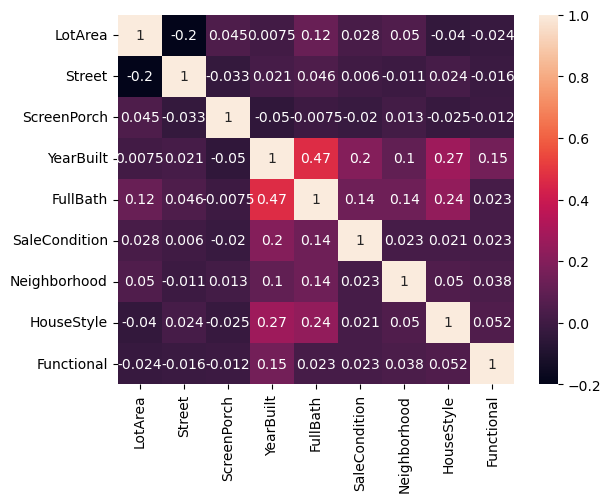

In [19]:
sns.heatmap(X_train_core.corr(), annot = True)
plt.show()

In [20]:
feature_title = ['LotArea', 'SaleCondition', 'YearBuilt', 'FullBath','Functional','Neighborhood']

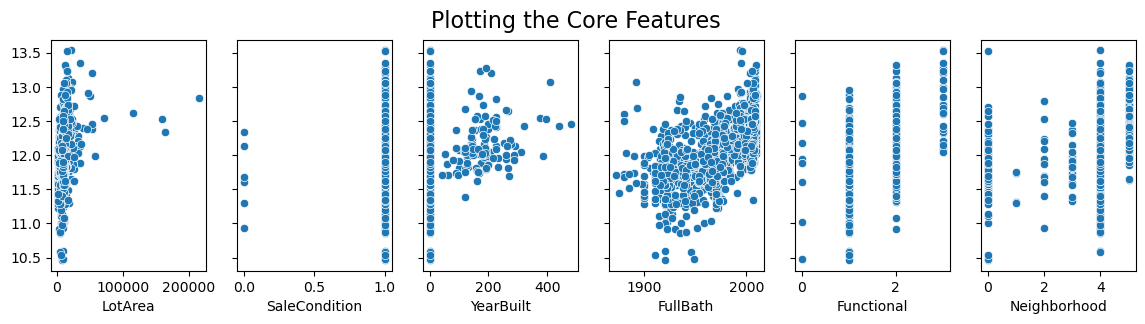

In [21]:
# Plotting some Core Features
fig, ax = plt.subplots(1,6, figsize = (14,3), sharey = True)
for i in range(len(ax)):
    sns.scatterplot(x = X_train_core.iloc[:,i], y = Y_train_core.values.flatten(), ax = ax[i])
    ax[i].set_xlabel(feature_title[i])
plt.suptitle("Plotting the Core Features", fontsize = 16)
plt.show()

## Creating our own Model!

In [24]:
def Model(X,Y,alpha,iterations):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    
    for i in range(iterations):
        
        # Cost Function
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        
        # Gradient Descent
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - alpha*d_theta
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print('Cost is:', cost)
        
    return theta, cost_list

In [25]:
iterations = 10000
alpha = 0.000000005
theta, cost_list = Model(X_train, y_train, alpha, iterations)

Cost is: 72.37539364066856
Cost is: 0.027904168310316873
Cost is: 0.017251065372144183
Cost is: 0.01635527270554823
Cost is: 0.01615883608753077
Cost is: 0.016040958498450636
Cost is: 0.01594682732375341
Cost is: 0.015867896317230137
Cost is: 0.01580056801478539
Cost is: 0.01574235530648289


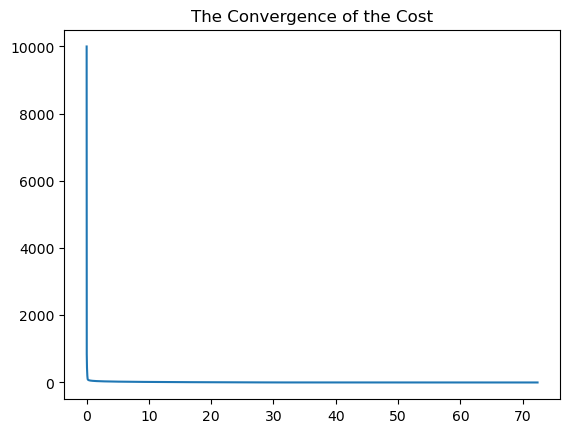

In [27]:
rng = np.arange(0, iterations)
sns.lineplot(x = cost_list, y = rng)
plt.title('The Convergence of the Cost')
plt.show()

In [28]:
y_pred = np.dot(X_test, theta)
pred_corr = np.corrcoef(y_pred.ravel(), y_test.ravel())

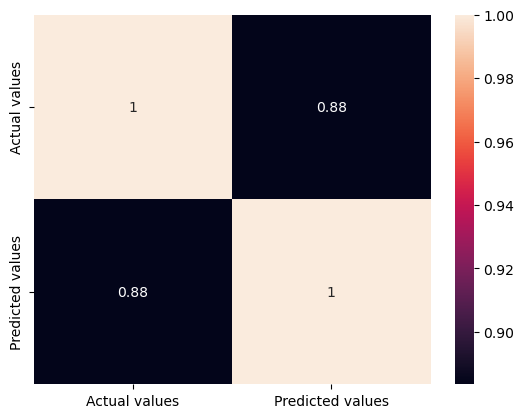

In [30]:
sns.heatmap(pred_corr, annot = True, xticklabels = ['Actual values','Predicted values'], yticklabels = ['Actual values', 'Predicted values'])
plt.show()

In [31]:
test_feature_title = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape','LandContour']

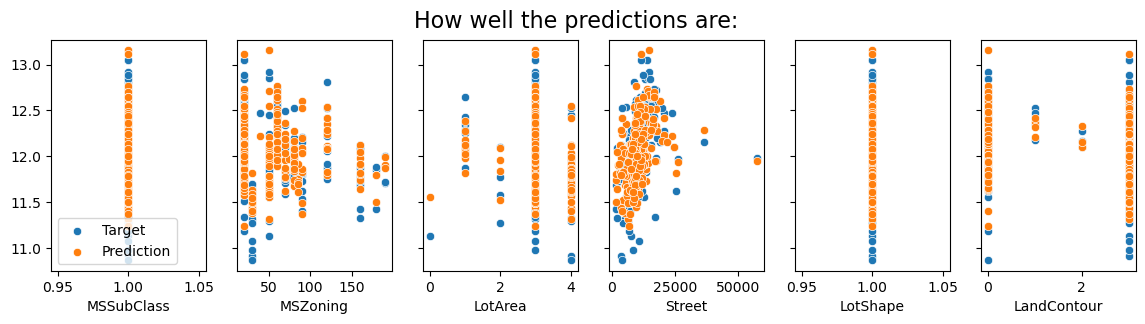

In [37]:
fig, ax = plt.subplots(1, 6, figsize = (14,3), sharey = True)
for i in range(len(ax)):
    sns.scatterplot(x = X_test[:,i], y = y_test.ravel(), ax = ax[i])
    ax[i].set_xlabel(test_feature_title[i])
    sns.scatterplot(x = X_test[:,i], y = y_pred.ravel(), ax = ax[i])
plt.suptitle('How well the predictions are:', fontsize = 16)
ax[0].legend(labels = ['Target', 'Prediction'])
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred, y_test)
print("This Algorithm's Accuracy:", 100 - (MSE*100), '%')
print("Mean Squared Error:", MSE*100, '%')

This Algorithm's Accuracy: 96.80116649932323 %
Mean Squared Error: 3.1988335006767747 %


### Wondering why this algorithm's accuracy is low?
### ***This is why...***

### Actual Model:

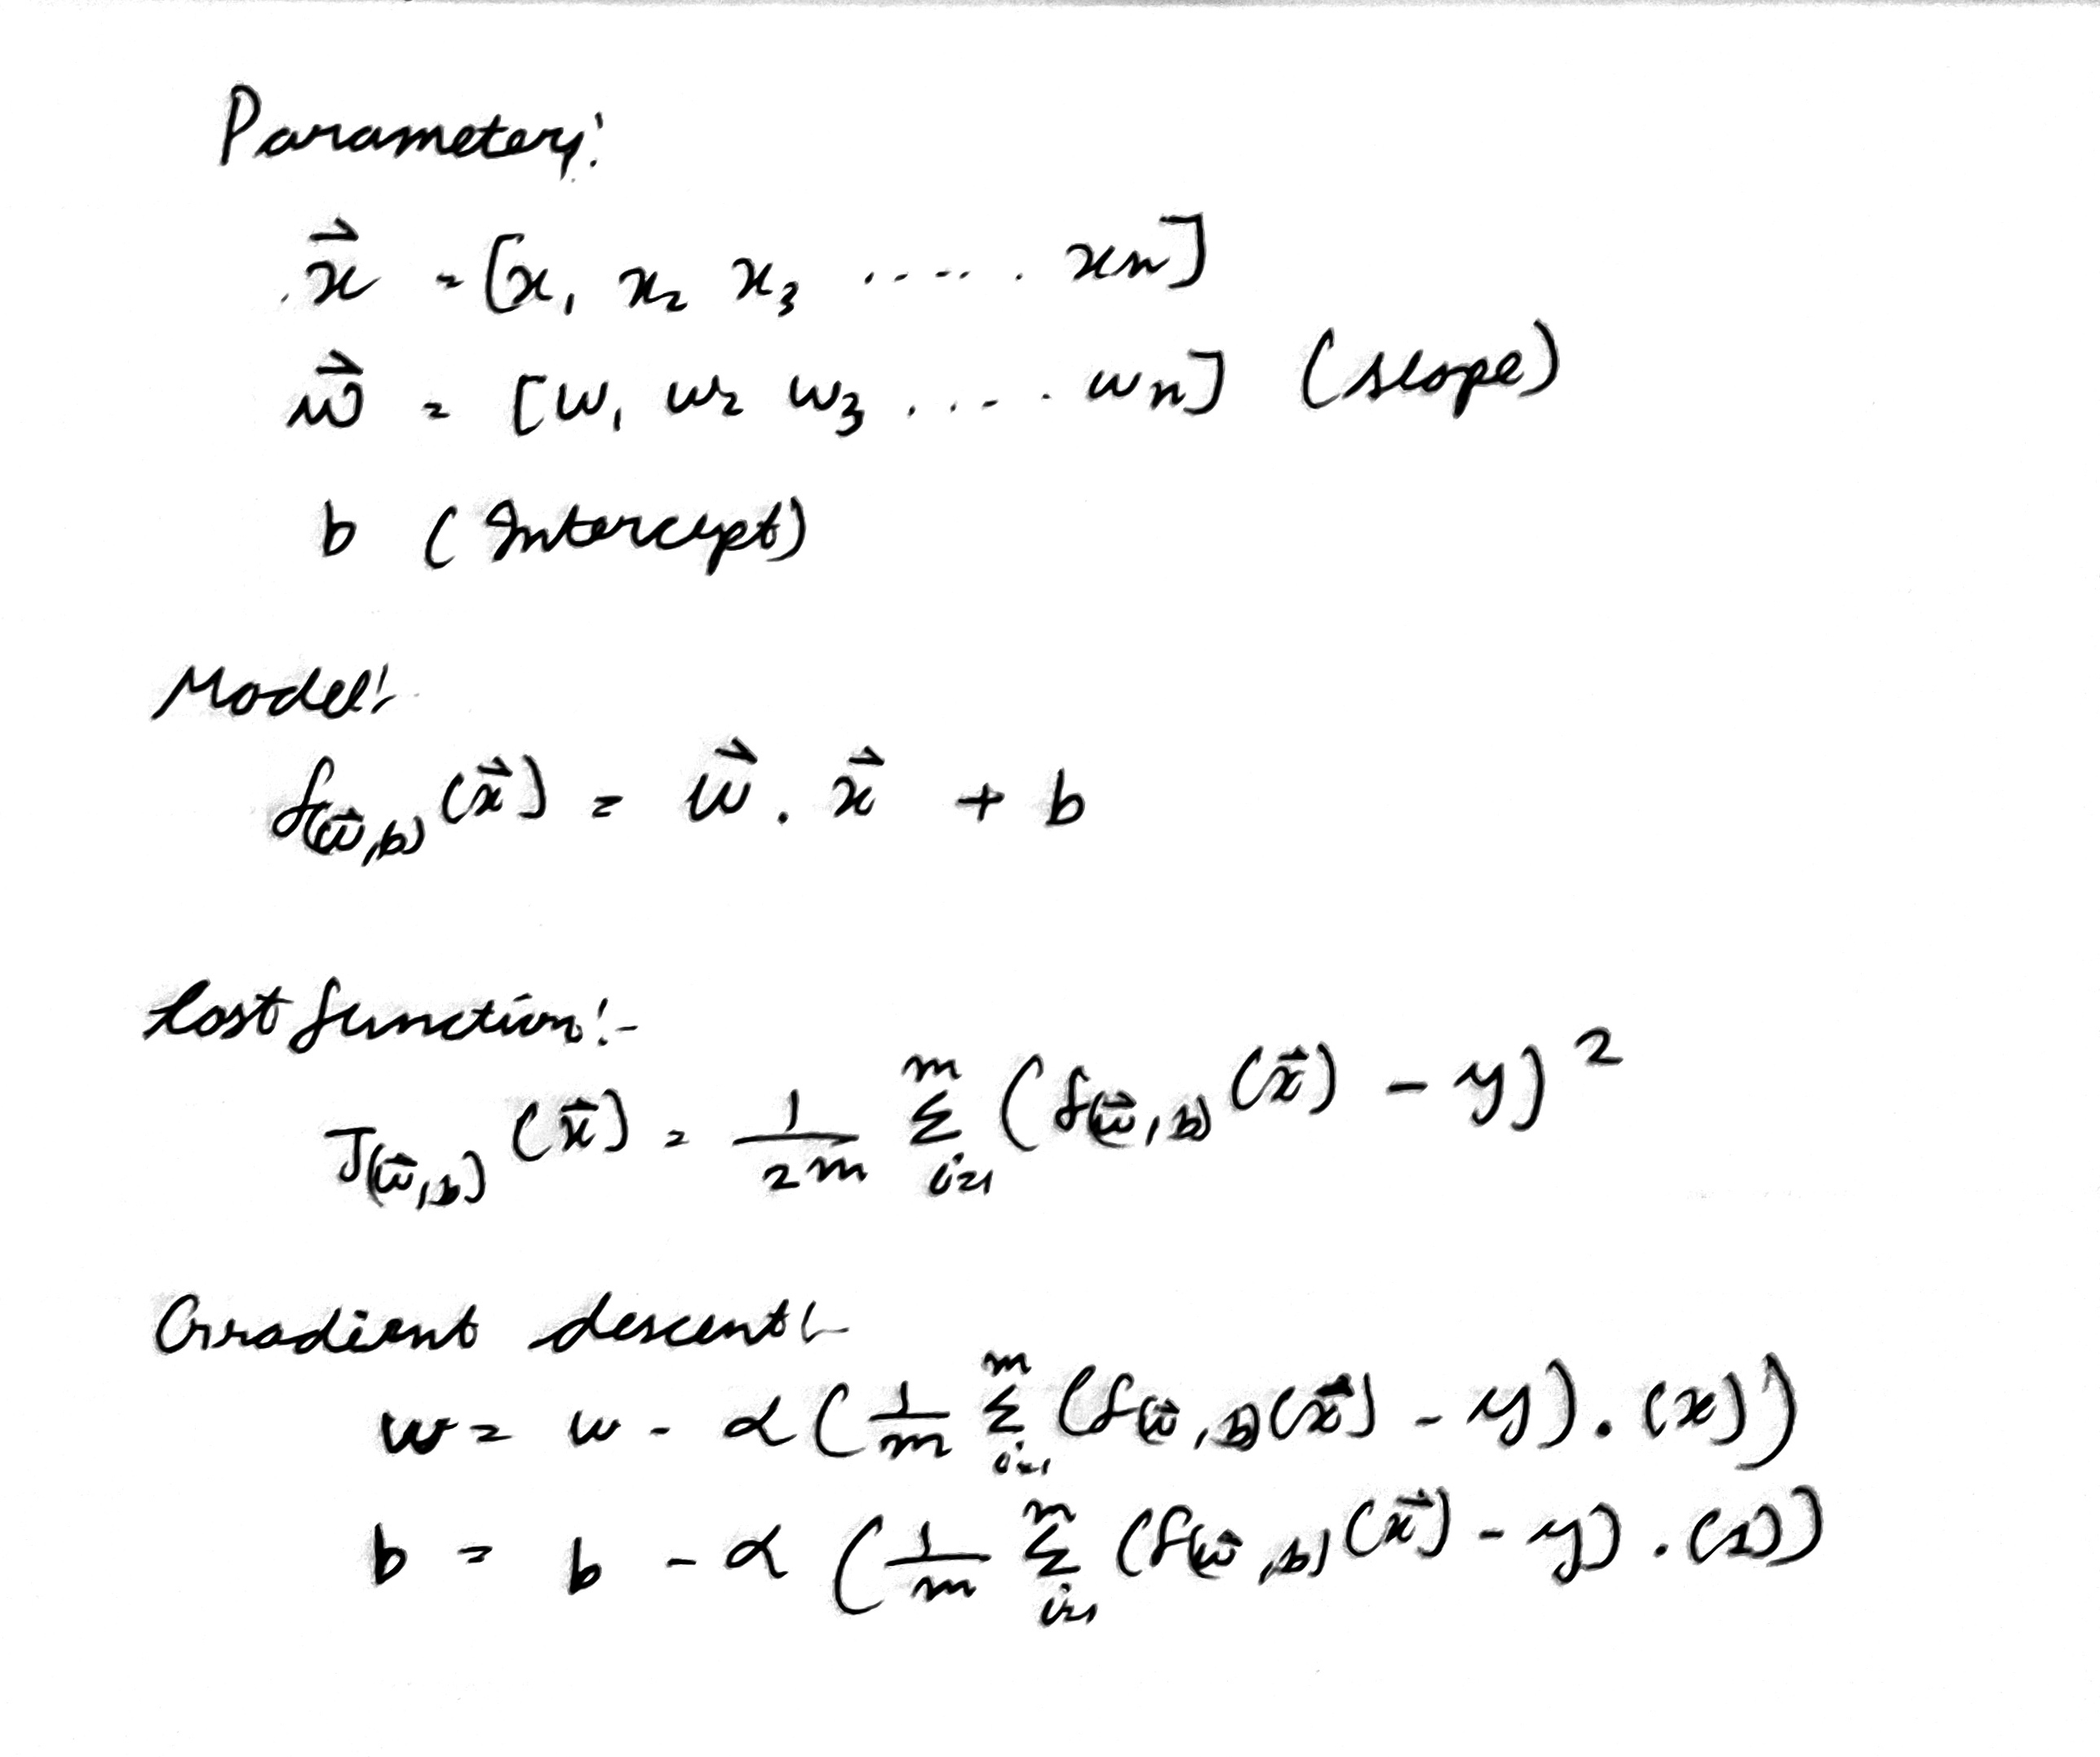

### Explanation
As you might have guessed the actual model of the Multiple linear regression has two parameters in addition to x which is Slope: 'w' and Bias: 'b' vectors but for the simplicity I've neglected the bias for the simplicity and have combined the ones with X_train and X_test in the same dimensions as those.

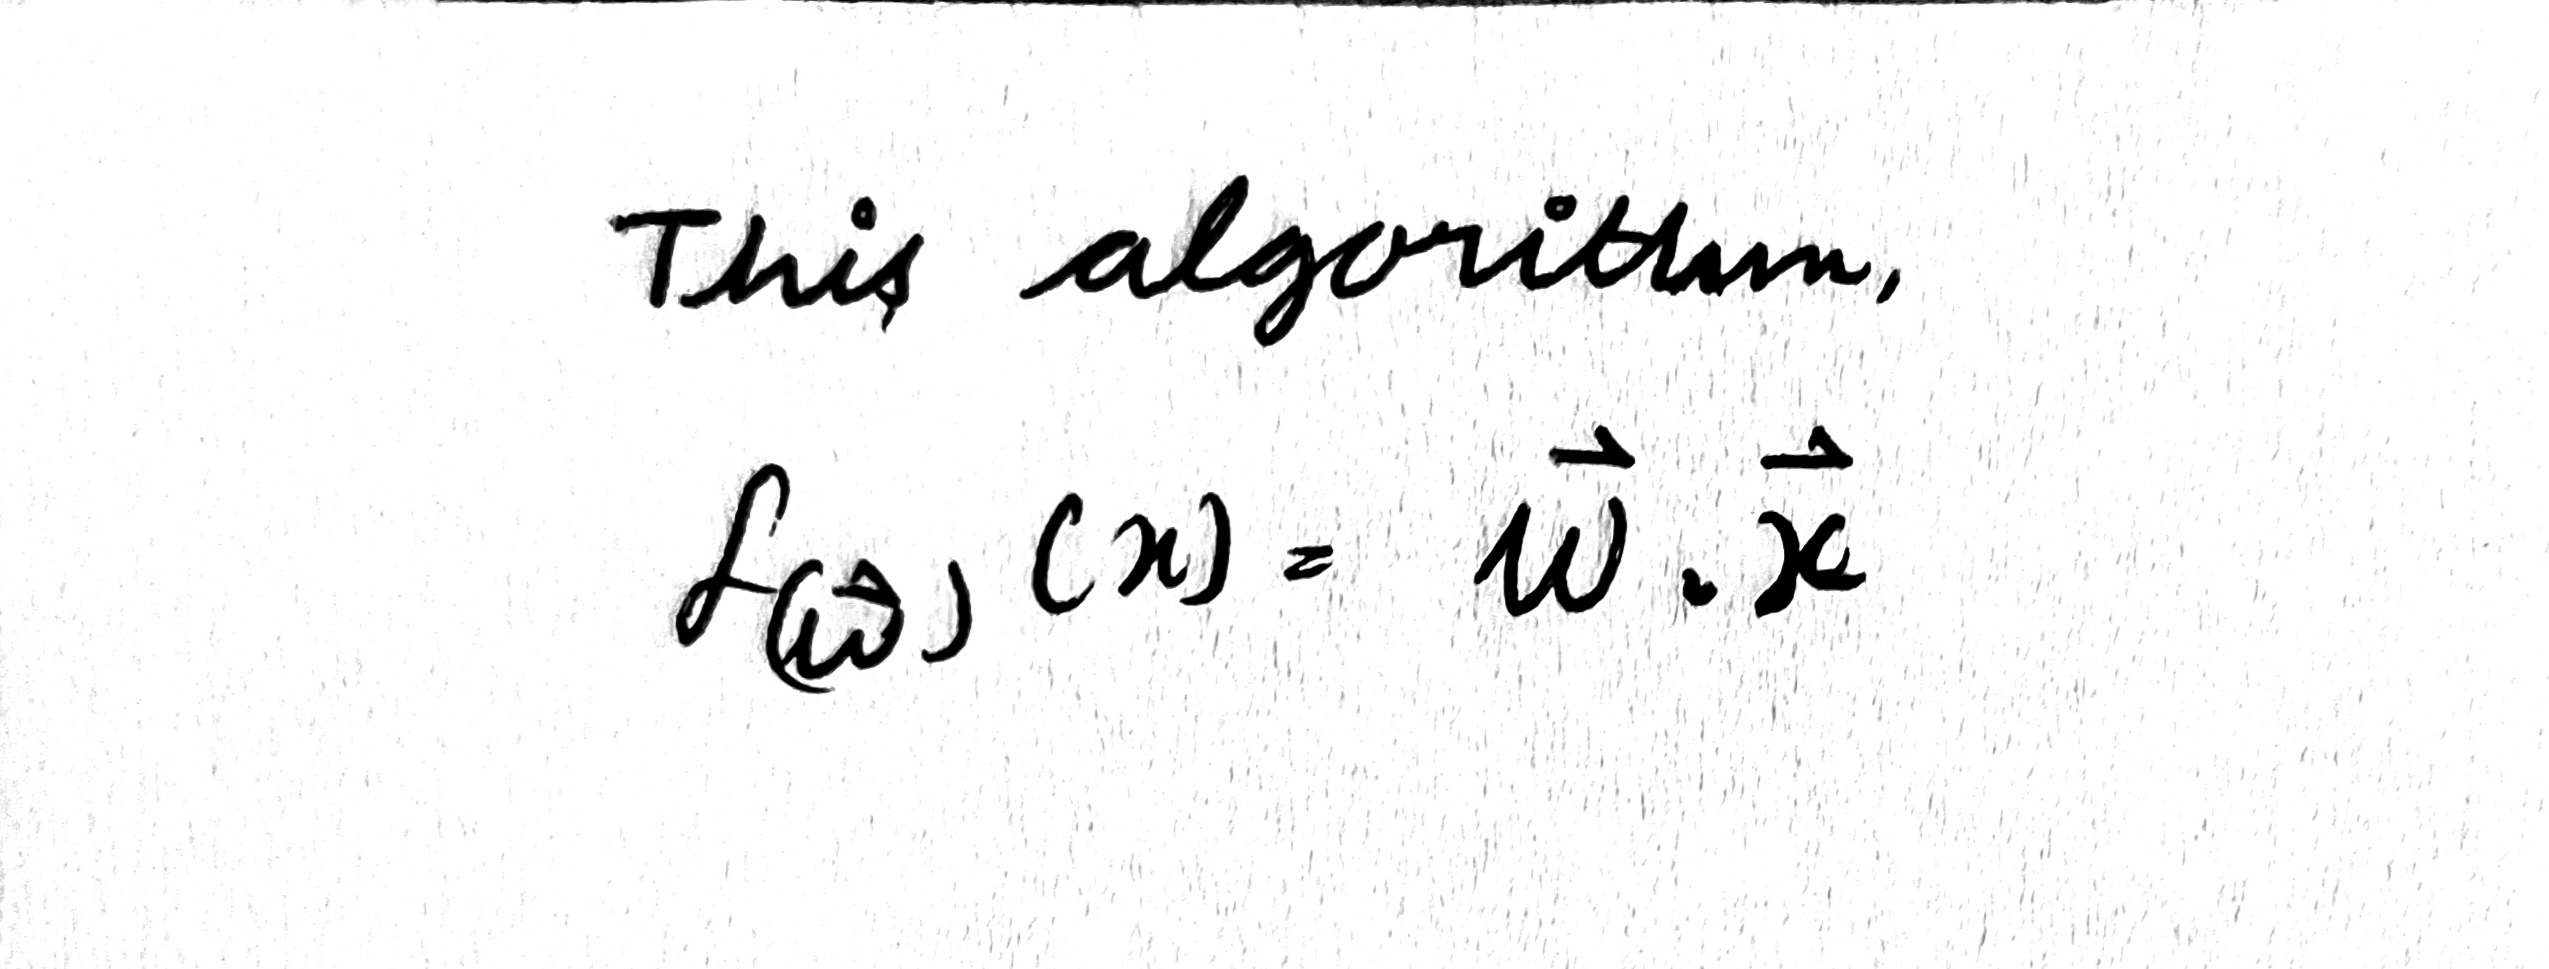

### Code Snippet

X_train = np.vstack((np.ones(x_train.shape[0], ), x_train.T)).T

X_test = np.vstack((np.ones(x_test.shape[0], ), x_test.T)).T

### Conclusion
And that's the reason the model's accuracy is slightly lower than the SGDRegressor function from the Sklearn Module.